## [Enzo LOUIS]
## [RECHERCHE PERSONNAGE] Étude des mots caractéristiques et fréquents
**Objectif : montrer les thèmes principales, les passions**

**Objectif : montrer les thèmes auquel ils font face dans les saisons les plus importantes (en terme de répliques, mentions, émotions)**

**Objectif : observer que les mots fréquents sont plus ou moins les mêmes pour tout le monde, des expressions américaines classiques**

#### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import re

# dataframe principales avec tous les dialogues
df = pd.read_csv("../Analyse_Sentiments/friends_dialogues_final.csv", encoding='utf-8')

# fonction utilitaire pour afficher les graphiques qui sont souvent les mêmes
def show_graphic(results, title, xlabel, ylabel, folder, filename):
    words, counts = zip(*results)
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{folder}/{filename}.png")
    plt.show()

characters = ['Chandler', 'Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica']
PATH = "../../src/main/resources/les_png/recherche_personnage/"

#### MOTS CARACTERISTIQUES GLOBALES

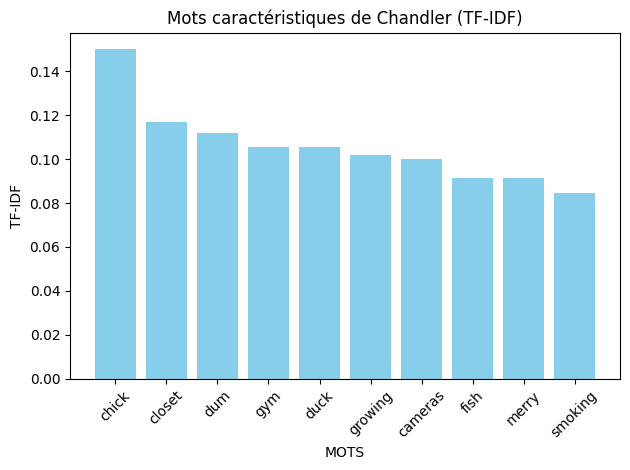

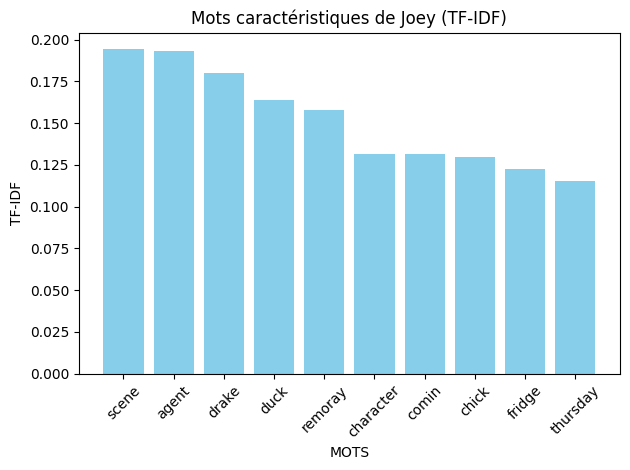

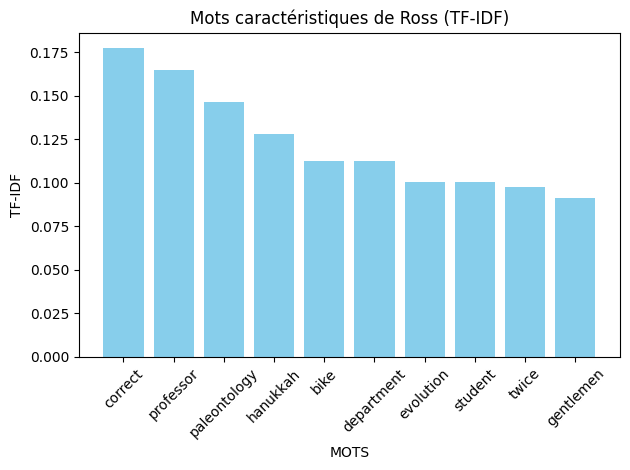

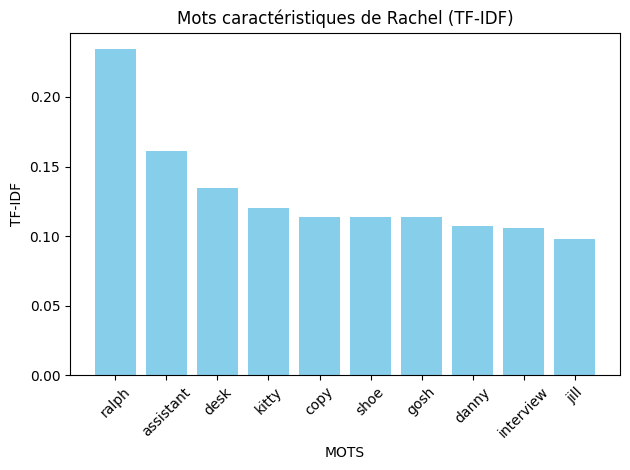

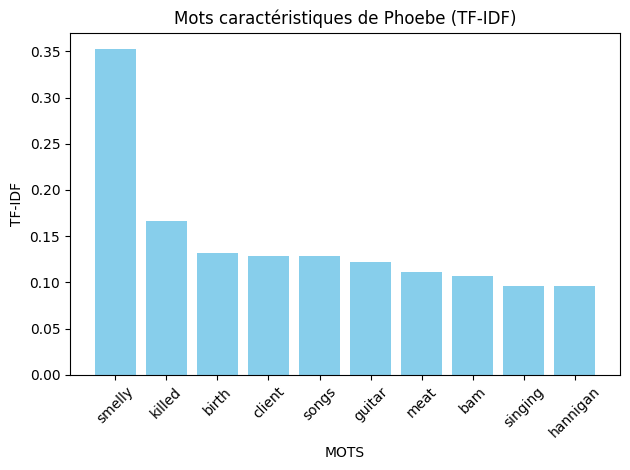

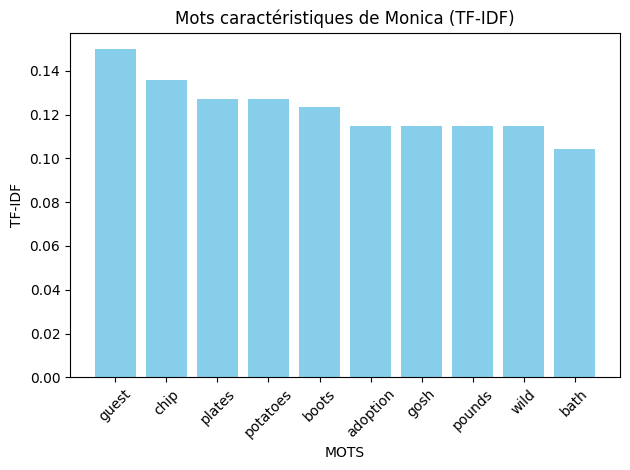

In [2]:
df_mot_important = pd.read_csv("top_10_mots_important_par_personnage_et_saison.csv", encoding='utf-8')

# données déjà prêtes, affichage graphique des mots caractéristiques pour chaque personnage
for i, row in df_mot_important.iterrows():
    char = row["character"]
    season = row["season"]
    if season == "ALL":
        mots = [row[f"mot_{j}_filtre"] for j in range(1, 11)]
        scores = [row[f"score_{j}_filtre"] for j in range(1, 11)]
        results = list(zip(mots, scores))
        show_graphic(results, "Mots caractéristiques de " + char + " (TF-IDF)", "MOTS", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante", f"{char.lower()}_all")

### MOT CARACTERISTIQUE SAISON X

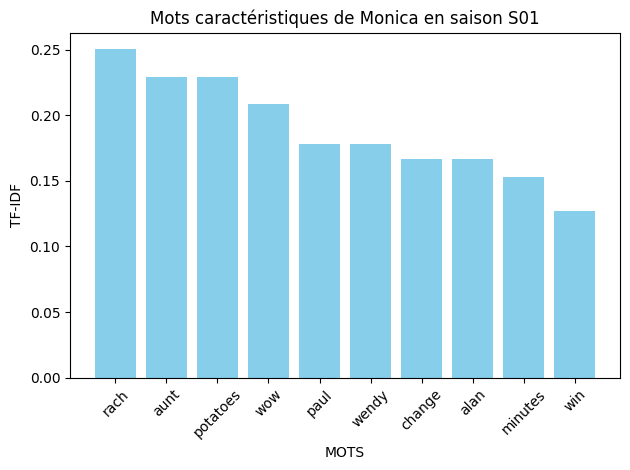

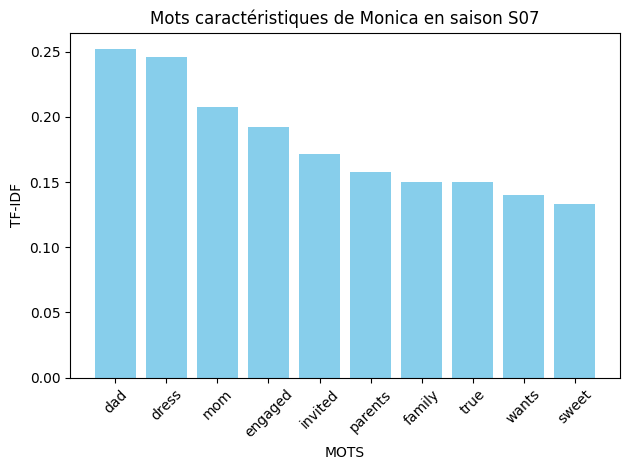

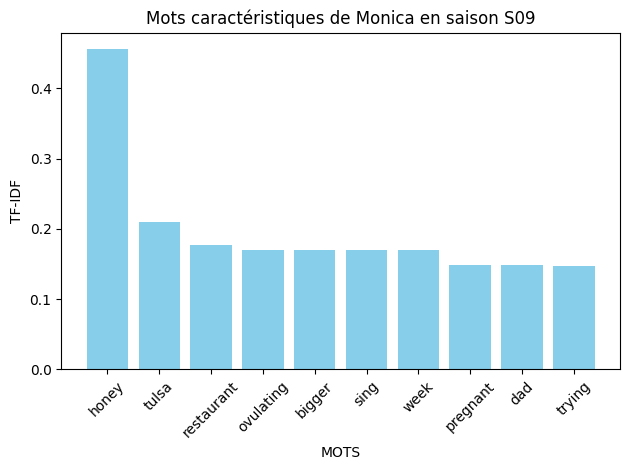

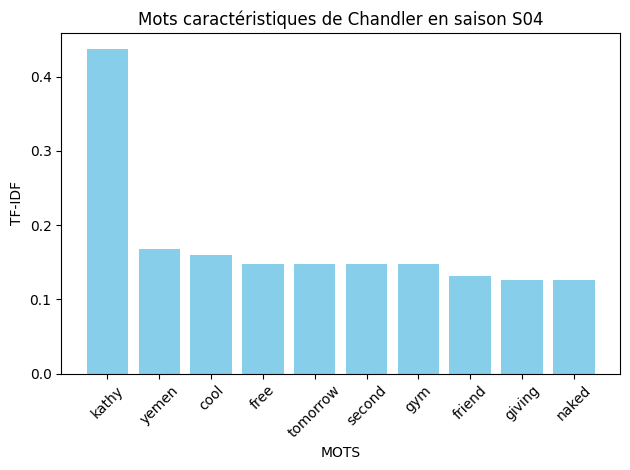

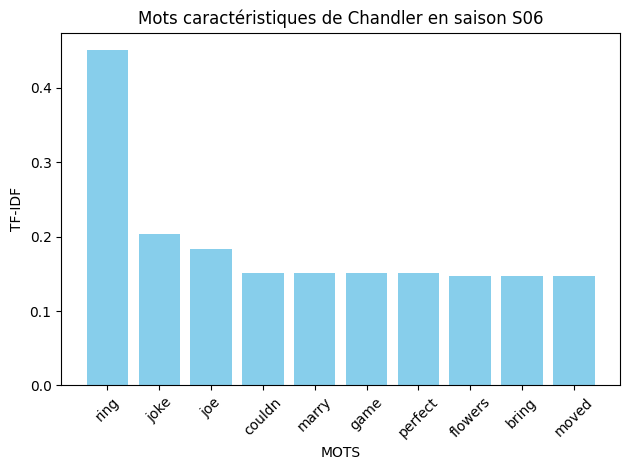

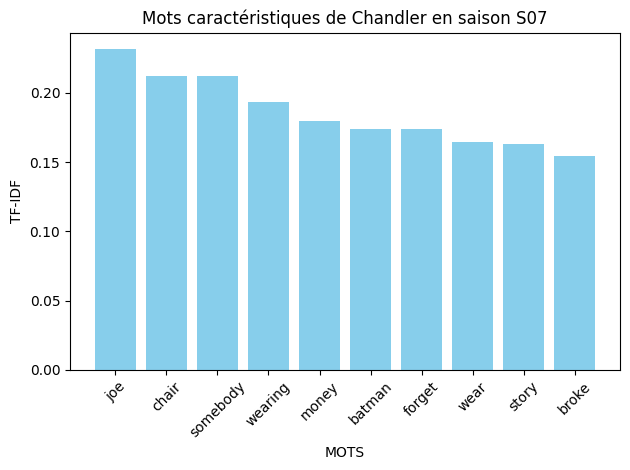

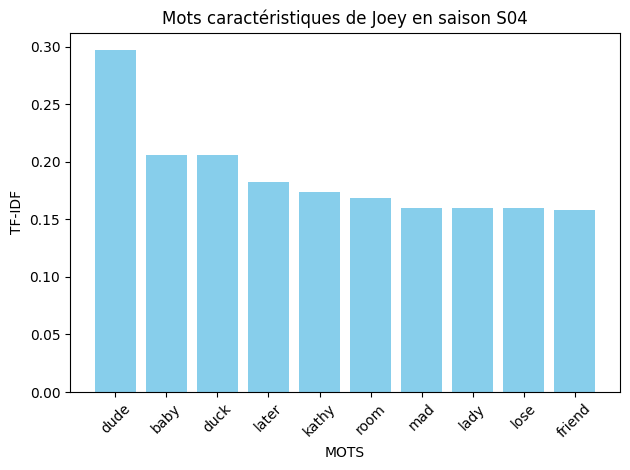

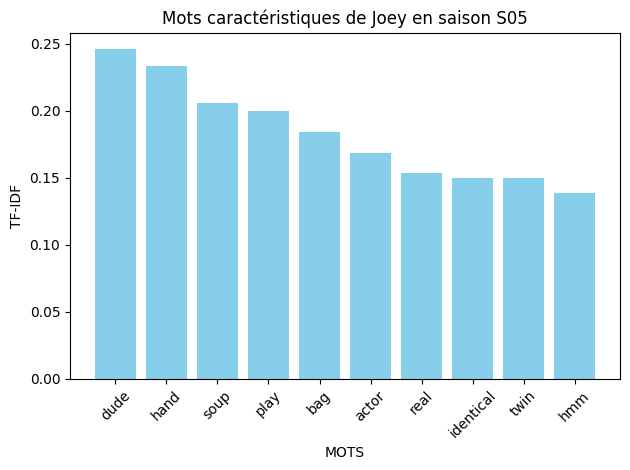

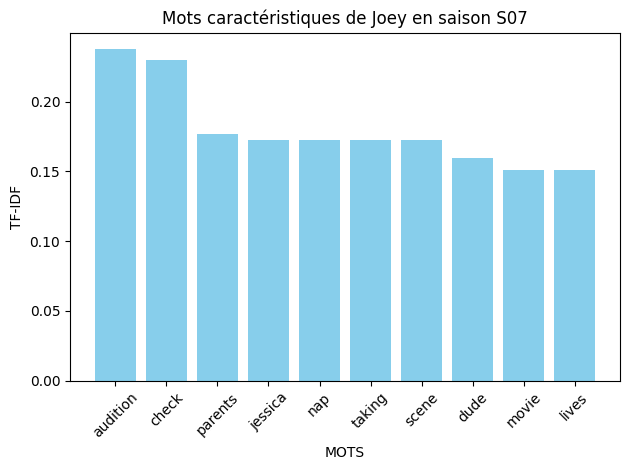

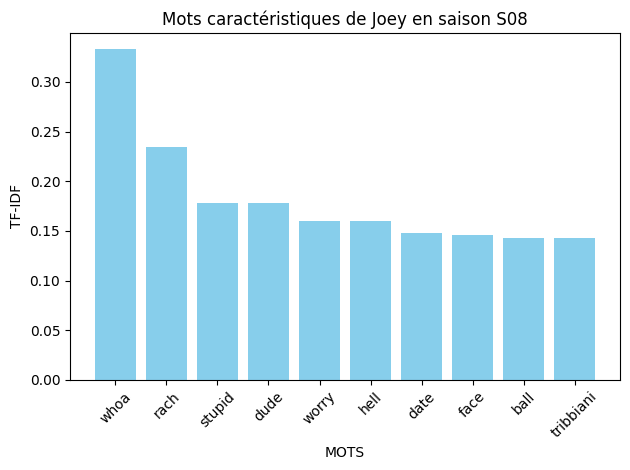

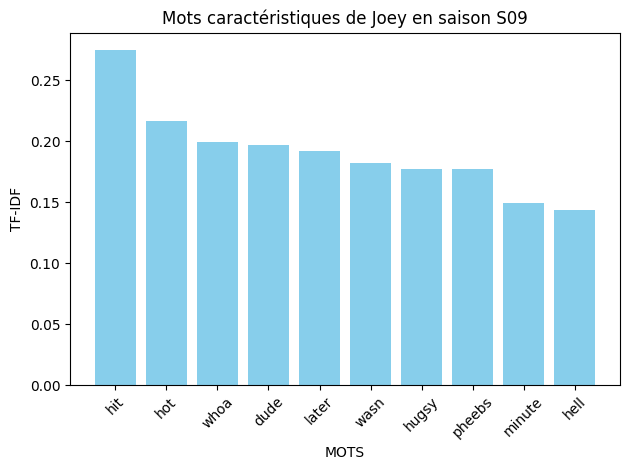

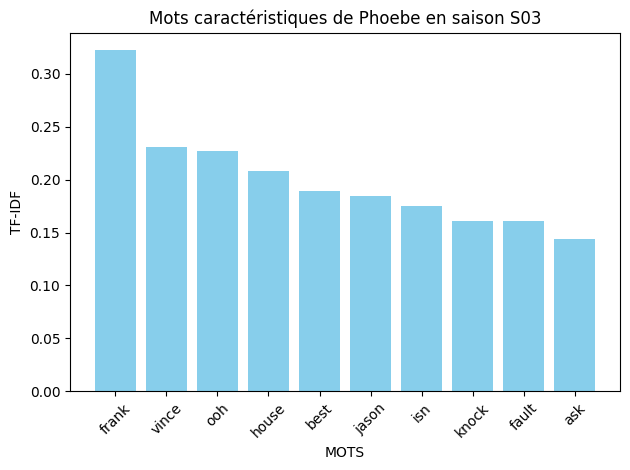

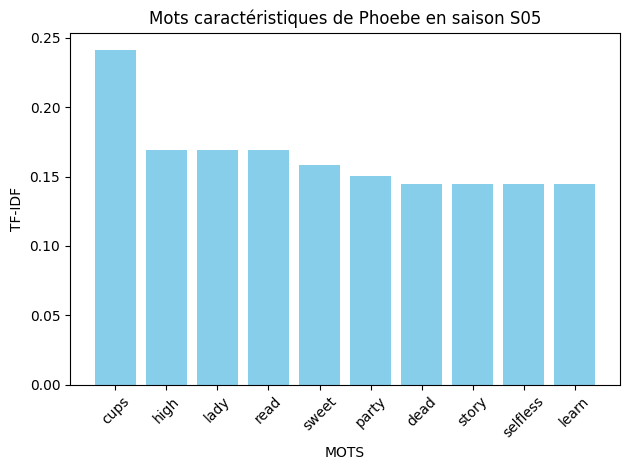

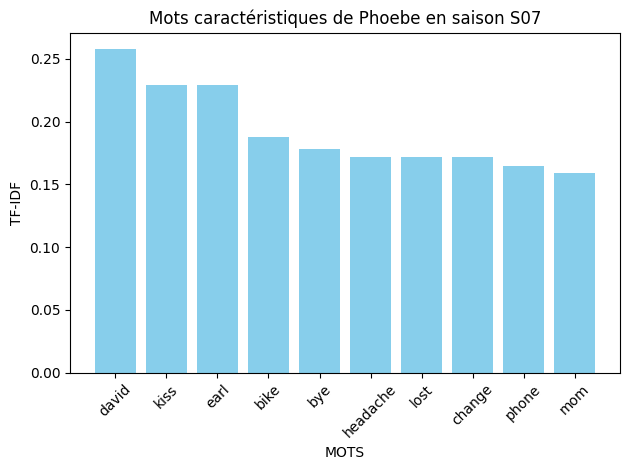

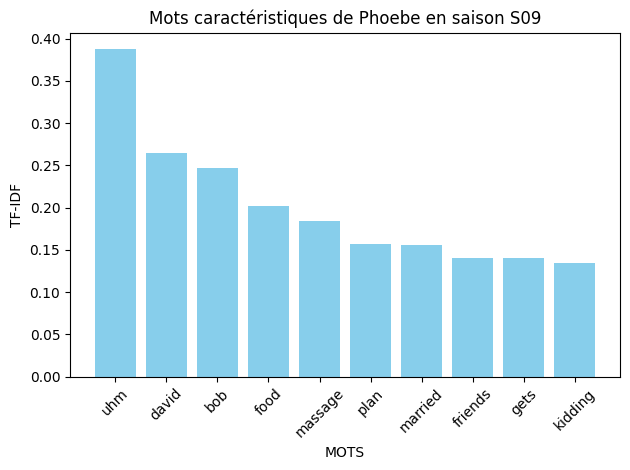

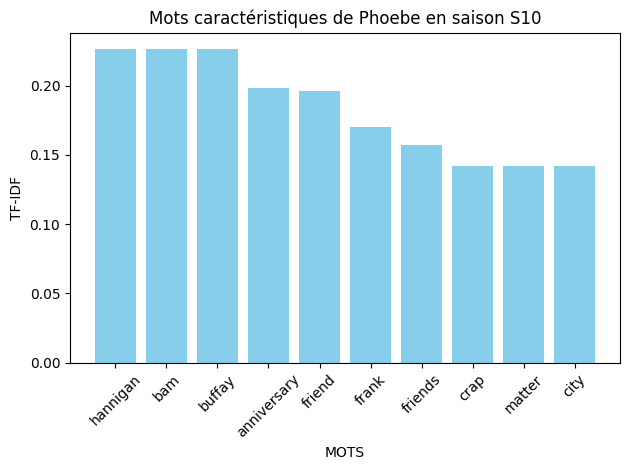

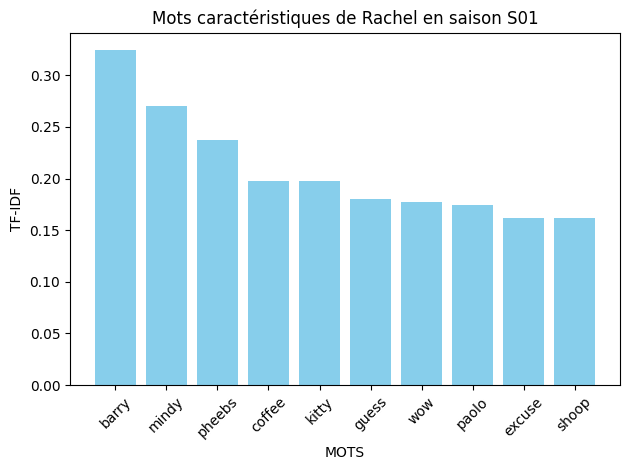

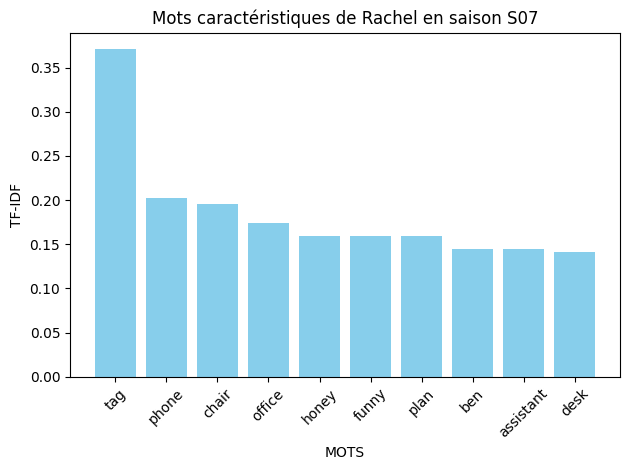

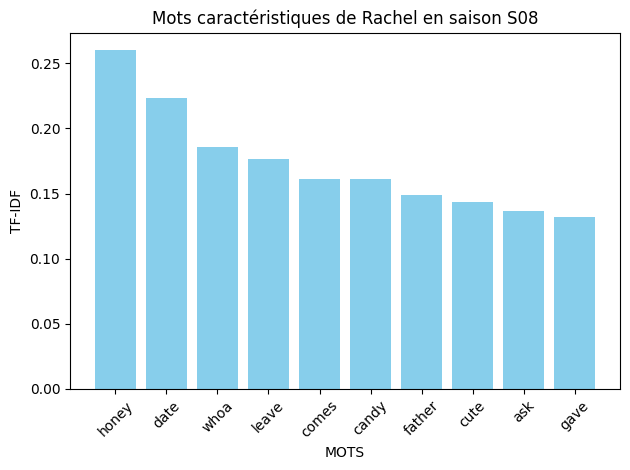

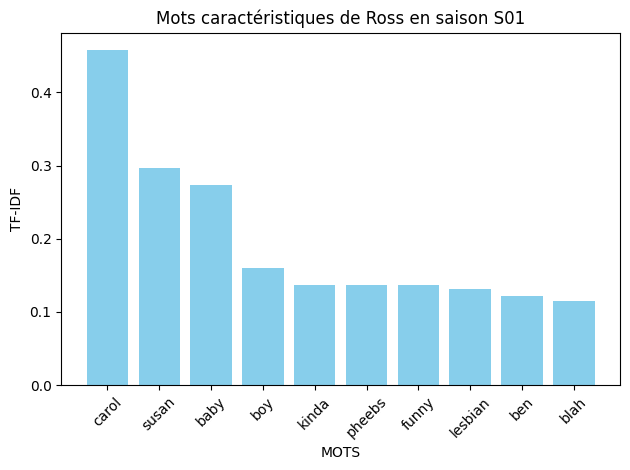

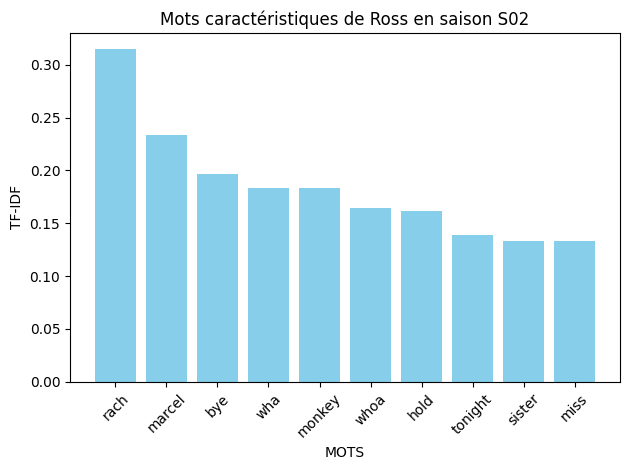

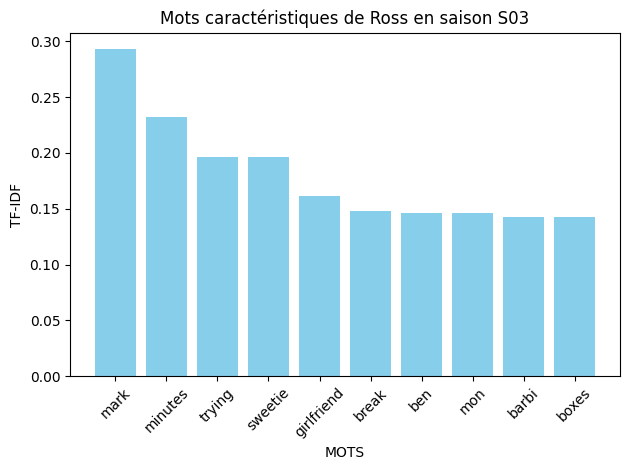

In [3]:
df_mot_important = pd.read_csv("top_10_mots_important_par_personnage_et_saison.csv", encoding='utf-8')

# générer tous les graphique dont on a besoin pour les saisons importantes
def generate_graphics(season_selection, character):
    for i, row in df_mot_important.iterrows():
        char = row["character"]
        season = row["season"]
        if season == season_selection and char == character:
            mots = [row[f"mot_{j}"] for j in range(1, 11)]
            scores = [row[f"score_{j}"] for j in range(1, 11)]
            results = list(zip(mots, scores))
            show_graphic(results, f"Mots caractéristiques de {char} en saison {season}", "MOTS", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante", f"{char.lower()}_saison_{season}")

# saisons intéressantes, important pour chaque personnage, basé sur les résultats des taux de répliques/mentions
usefull_graphics = {
    "Monica": ["S01", "S07", "S09"],
    "Chandler": ["S04", "S06", "S07"],
    "Joey": ["S04", "S05", "S07", "S08", "S09"],
    "Phoebe": ["S03", "S05", "S07", "S09", "S10"],
    "Rachel": ["S01", "S07", "S08"],
    "Ross": ["S01", "S02", "S03"]
}
for character, seasons in usefull_graphics.items():
    for season in seasons:
        generate_graphics(season, character)

### La joie revient énormément comme sentiments dans la série (observé dans l'analyse sentiments), quels sont les domaines dans l'intrigue de chaque personnages, qui les rend heureux ? (pas les mots les plus heureux, l'histoire)

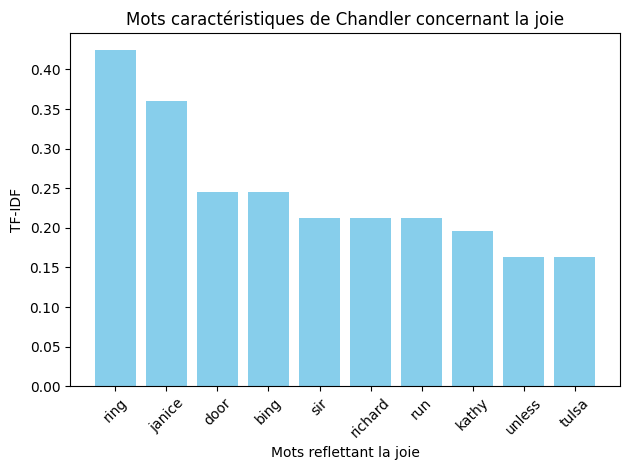

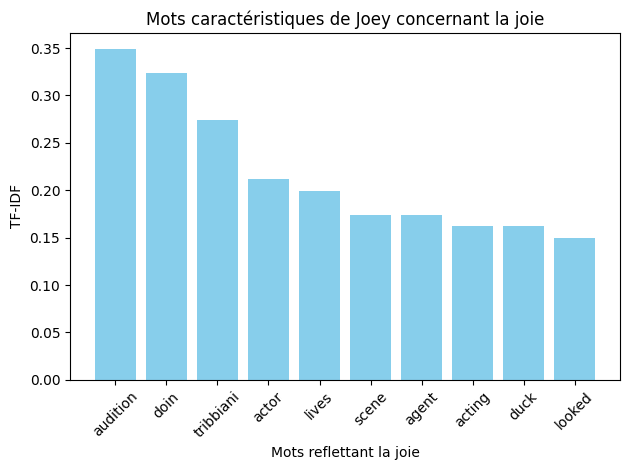

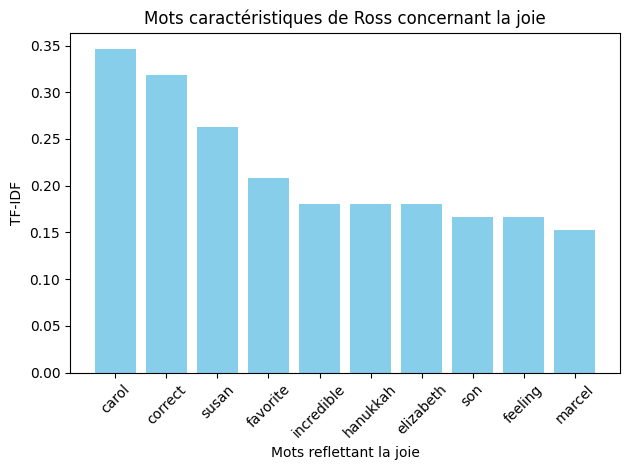

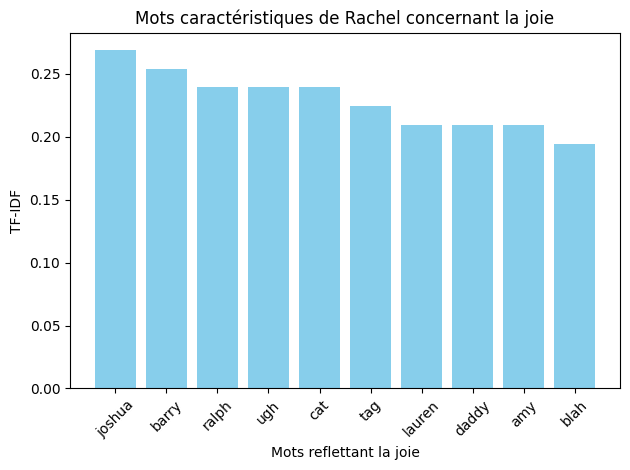

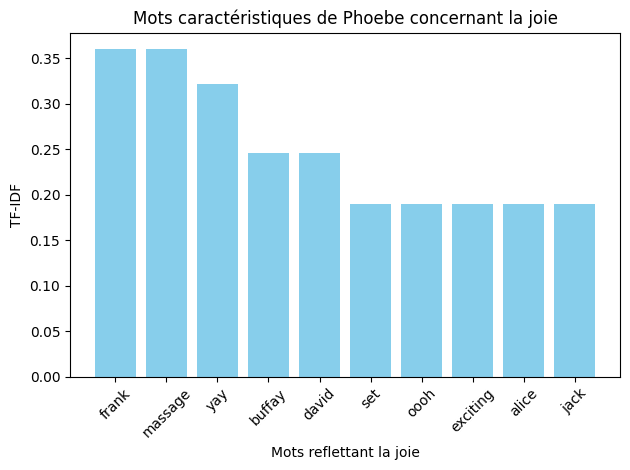

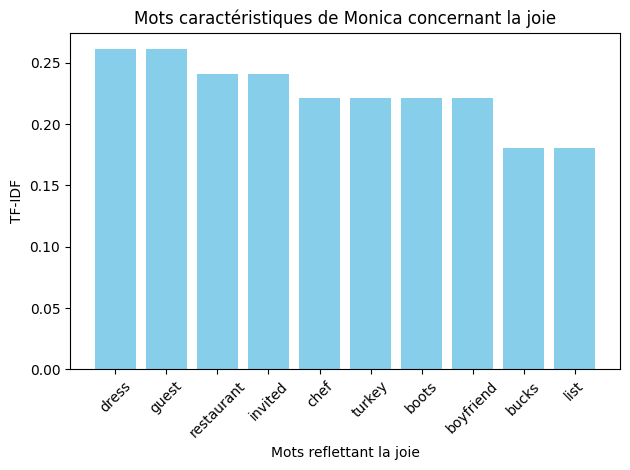

In [4]:
df_joy = pd.read_csv("top_10_mots_important_par_personnage_joy.csv", encoding='utf-8')

# données déjà prêtes, affichage graphique des mots caractéristiques pour chaque personnage concernant la joie
# pour la série entière
for i, row in df_joy.iterrows():
    char = row["character"]
    mots = [row[f"mot_{j}"] for j in range(1, 11)]
    scores = [row[f"score_{j}"] for j in range(1, 11)]
    results = list(zip(mots, scores))
    show_graphic(results, "Mots caractéristiques de " + char + " concernant la joie", "Mots reflettant la joie", "TF-IDF", f"{PATH}/mot_important_personnage_saison_importante_joy", f"{char.lower()}_all")

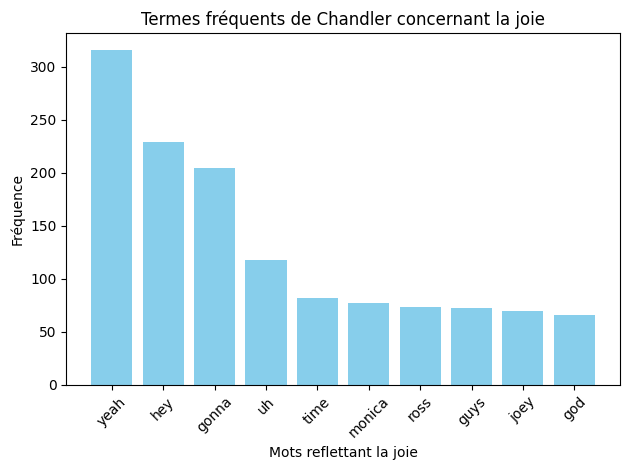

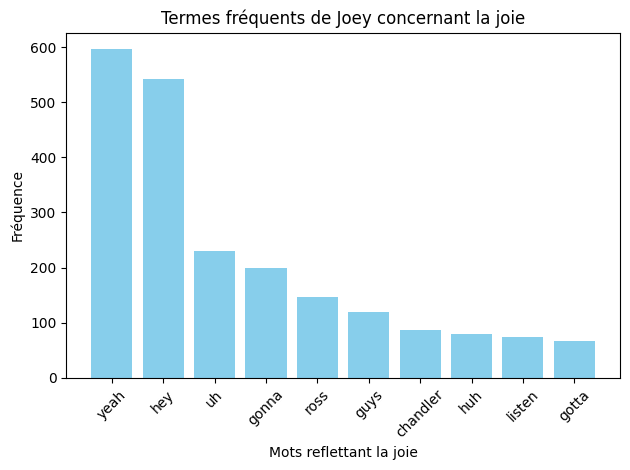

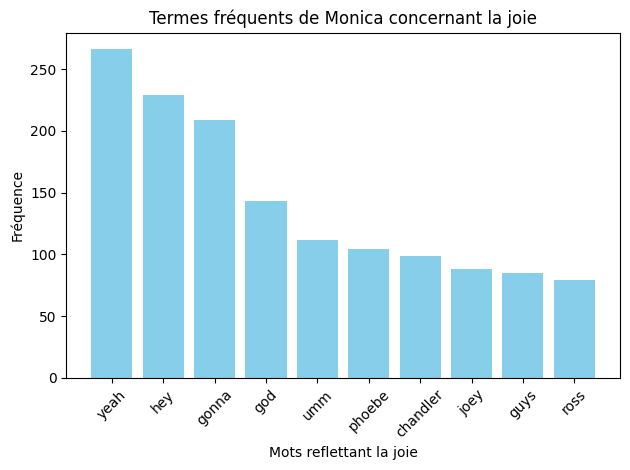

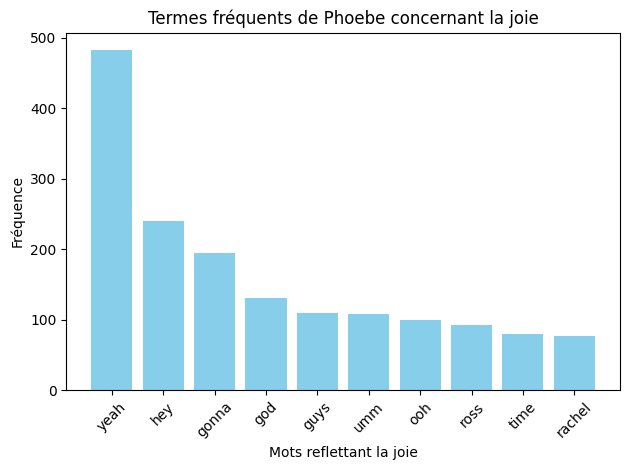

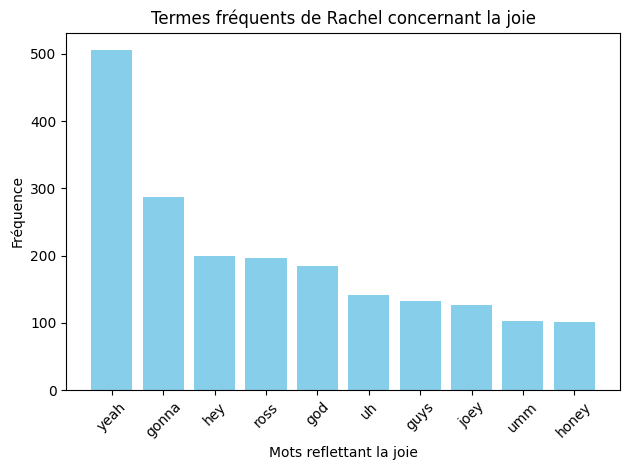

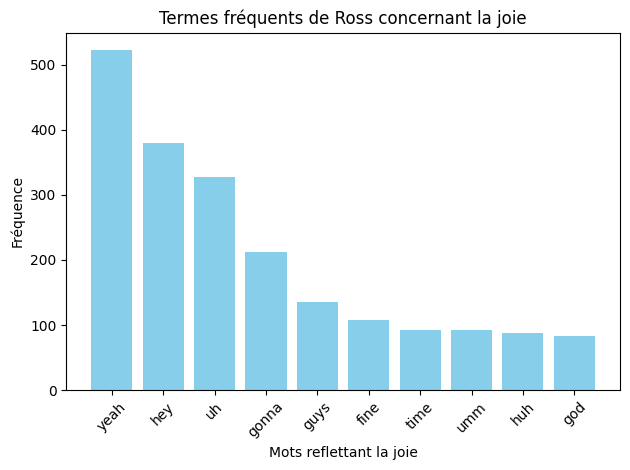

In [5]:
df_joy = pd.read_csv("top_10_mots_par_personnage_joy.csv", encoding='utf-8')

# même chose pour les mots les plus fréquents concernant la joie (inutilisé finalement dans l'interface)
for i, row in df_joy.iterrows():
    char = row["character"]
    mots = [row[f"mot_{j}"] for j in range(1, 11)]
    scores = [row[f"freq_{j}"] for j in range(1, 11)]
    results = list(zip(mots, scores))
    show_graphic(results, "Termes fréquents de " + char + " concernant la joie", "Mots reflettant la joie", "Fréquence", f"{PATH}/mot_important_personnage_saison_importante_joy", f"{char.lower()}_frequence_all")

##### Autres - Pré-analyse rapide TF-IDF moyen

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

characters = ['Chandler', 'Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica']

char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line']
    full_text = " ".join(lines)
    char_docs.append(full_text)

# personnage = un document
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(char_docs)
words = vectorizer.get_feature_names_out()

# tf-idf moyen persos
tfidf_means = {}
for i, char in enumerate(characters):
    row = X[i].toarray().flatten()
    mean_score = row.mean()
    tfidf_means[char] = mean_score

print(tfidf_means)

{'Chandler': np.float64(0.001261428557976972), 'Joey': np.float64(0.0011336973049717925), 'Ross': np.float64(0.0011729850411648052), 'Rachel': np.float64(0.0009683600277194713), 'Phoebe': np.float64(0.0010593181024178275), 'Monica': np.float64(0.0011676743410541175)}


#### [NON UTILISE DANS IHM] IDF-TF global (documents=Episode) VS IDF-TF personnages
*Observation des épisodes très marquants de la série et comparaison avec les personnages impliqués dedant (qui en parle beaucoup)*

In [8]:
def clean_line(line):
    """
    Enlève les annotations/didascalies, les ensemble de mots entre parenthèses
    Mets en minuscule
    Enlève les caractères spéciaux
    :param line: réplique de dialogue
    :return: 
    """
    line = re.sub(r'\([^)]*\)', '', line)
    
    # lower + clean special char + split
    line = re.sub(r'[^\w\s]', ' ', line.lower())
    return re.sub(r'\s+', ' ', line).strip()

with open("advanced_stopwords.txt") as stopwords:
    stopwords_set = set(stopwords.read().split("\n"))

# TF-IDF global (documents = répliques)

documents = df['line'].tolist()

df['episode_id'] = df['season']
episodes = df.groupby('episode_id')['line'].apply(lambda lines: ' '.join(lines)).reset_index()
episodes['line'] = [clean_line(line) for line in episodes['line']]
stopwords_set = ['paolo', 'erica', 'bonnie', 'amanda', 'chloe', 'tim', 'brian', 'susie', 'tailor', 'alex', 'isabella', ]
stopwords_set = list(set(ENGLISH_STOP_WORDS).union(stopwords_set))

vectorizer_global = TfidfVectorizer(stop_words=stopwords_set, min_df=2, max_df=0.2, token_pattern=r"(?u)\b\w\w\w+\b")

X_global = vectorizer_global.fit_transform(episodes['line'])
mean_tfidf_global = X_global.mean(axis=0).A1
words_global = vectorizer_global.get_feature_names_out()

# Top 10 mots TF-IDF globaux
top_indices_global = mean_tfidf_global.argsort()[::-1][:10]
top_global_words = [words_global[i] for i in top_indices_global]

print("Top 10 mots TF-IDF globaux :", ", ".join(top_global_words), "\n")

# TF-IDF par personnage (documents = 1 par personnage), avec vocabulaire global ---

# Construire un document par personnage
char_docs = []
for char in characters:
    lines = df[df['character'] == char]['line']
    full_text = " ".join(lines)
    full_text = clean_line(full_text)
    char_docs.append(full_text)

# reutilisation du vocabulaire du global
vectorizer_persona = TfidfVectorizer(max_df=0.8, min_df=2, vocabulary=vectorizer_global.vocabulary_, stop_words=stopwords_set, token_pattern=r"(?u)\b\w\w+\b")

X_persona = vectorizer_persona.fit_transform(char_docs)
words_persona = vectorizer_persona.get_feature_names_out()

# comparaison : top perso vs top global

print("comparaison entre mots TF-IDF globaux et ceux des personnages :\n")

for i, char in enumerate(characters):
    row = X_persona[i].toarray().flatten()
    top_indices_persona = row.argsort()[::-1][:10]
    top_persona_words = [words_persona[j] for j in top_indices_persona]

    print(top_persona_words)

    # Mots communs entre top global et top perso
    common_words = [w for w in top_global_words if w in top_persona_words]

    print(f"{char}: {len(common_words)} mot(s) en commun ({', '.join(common_words)})")
    print()


Top 10 mots TF-IDF globaux : kathy, adoption, pottery, lottery, dina, enters, whaddya, cheesecake, mere, somethin 

comparaison entre mots TF-IDF globaux et ceux des personnages :

['kathy', 'cheesecake', 'perfection', 'freedom', 'helen', 'wenus', 'courtside', 'nick', 'casey', 'bings']
Chandler: 2 mot(s) en commun (kathy, cheesecake)

['somethin', 'pacino', 'kathy', 'extras', 'pulp', 'dina', 'bert', 'wheel', 'naa', 'everest']
Joey: 3 mot(s) en commun (kathy, dina, somethin)

['piv', 'pivot', 'barbi', 'mesozoic', 'armadillo', 'mere', 'theories', 'maccabees', 'dialing', 'muriel']
Ross: 1 mot(s) en commun (mere)

['dina', 'flicks', 'ladyfingers', 'resources', 'trifle', 'cheesecake', 'pardon', 'evaluation', 'bla', 'rap']
Rachel: 2 mot(s) en commun (dina, cheesecake)

['earl', 'hannigan', 'uhuh', 'chords', 'selfless', 'garlic', 'ellen', 'russia', 'lilly', 'volunteer']
Phoebe: 0 mot(s) en commun ()

['adoption', 'barca', 'lounger', 'flock', 'recipe', 'maintenance', 'catering', 'hostess', 'be